In [1]:
import sys
import os
import numpy as np
import pandas as pd


In [2]:
#Read targets

targets_strand_df = pd.read_csv('/home/drk/seqnn/data/models/v2/f0c0/testg-0/acc.txt', index_col=0, sep='\t')#[['identifier', 'description']]


In [3]:
#Store original target indices

targets_strand_df['row_index'] = np.arange(len(targets_strand_df), dtype='int32')


In [8]:
#Load predictions
df_pred = pd.read_csv("/home/drk/seqnn/data/models/v2/f0c0/testg-0/gene_preds.tsv", sep='\t')
df_pred = df_pred.rename(columns={'Unnamed: 0' : 'gene_id'})

#Load targets
df_true = pd.read_csv("/home/drk/seqnn/data/models/v2/f0c0/testg-0/gene_targets.tsv", sep='\t')
df_true = df_true.rename(columns={'Unnamed: 0' : 'gene_id'})


In [9]:
#Print GTEx blood targets

targets_strand_df.loc[targets_strand_df['description'] == "RNA:blood"]


,identifier,pearsonr,r2,pearsonr_norm,r2_norm,pearsonr_gene,description,row_index
7531,GTEX-1I4MK-0002-SM-EZ6M9.1,0.933338,0.861099,0.797790,0.626819,0.927769,RNA:blood,875
7532,GTEX-1LB8K-0005-SM-DIPED.1,0.927456,0.855112,0.819024,0.666790,0.892870,RNA:blood,876
7533,GTEX-1OKEX-0006-SM-DKPQ2.1,0.904324,0.811561,0.770573,0.592115,0.879937,RNA:blood,877


In [10]:
#Get target columns from prediction dataframe

cols = df_pred.columns.values.tolist()[1:]


Spearman R = 0.949
Pearson R = 0.933
 - n = 2487


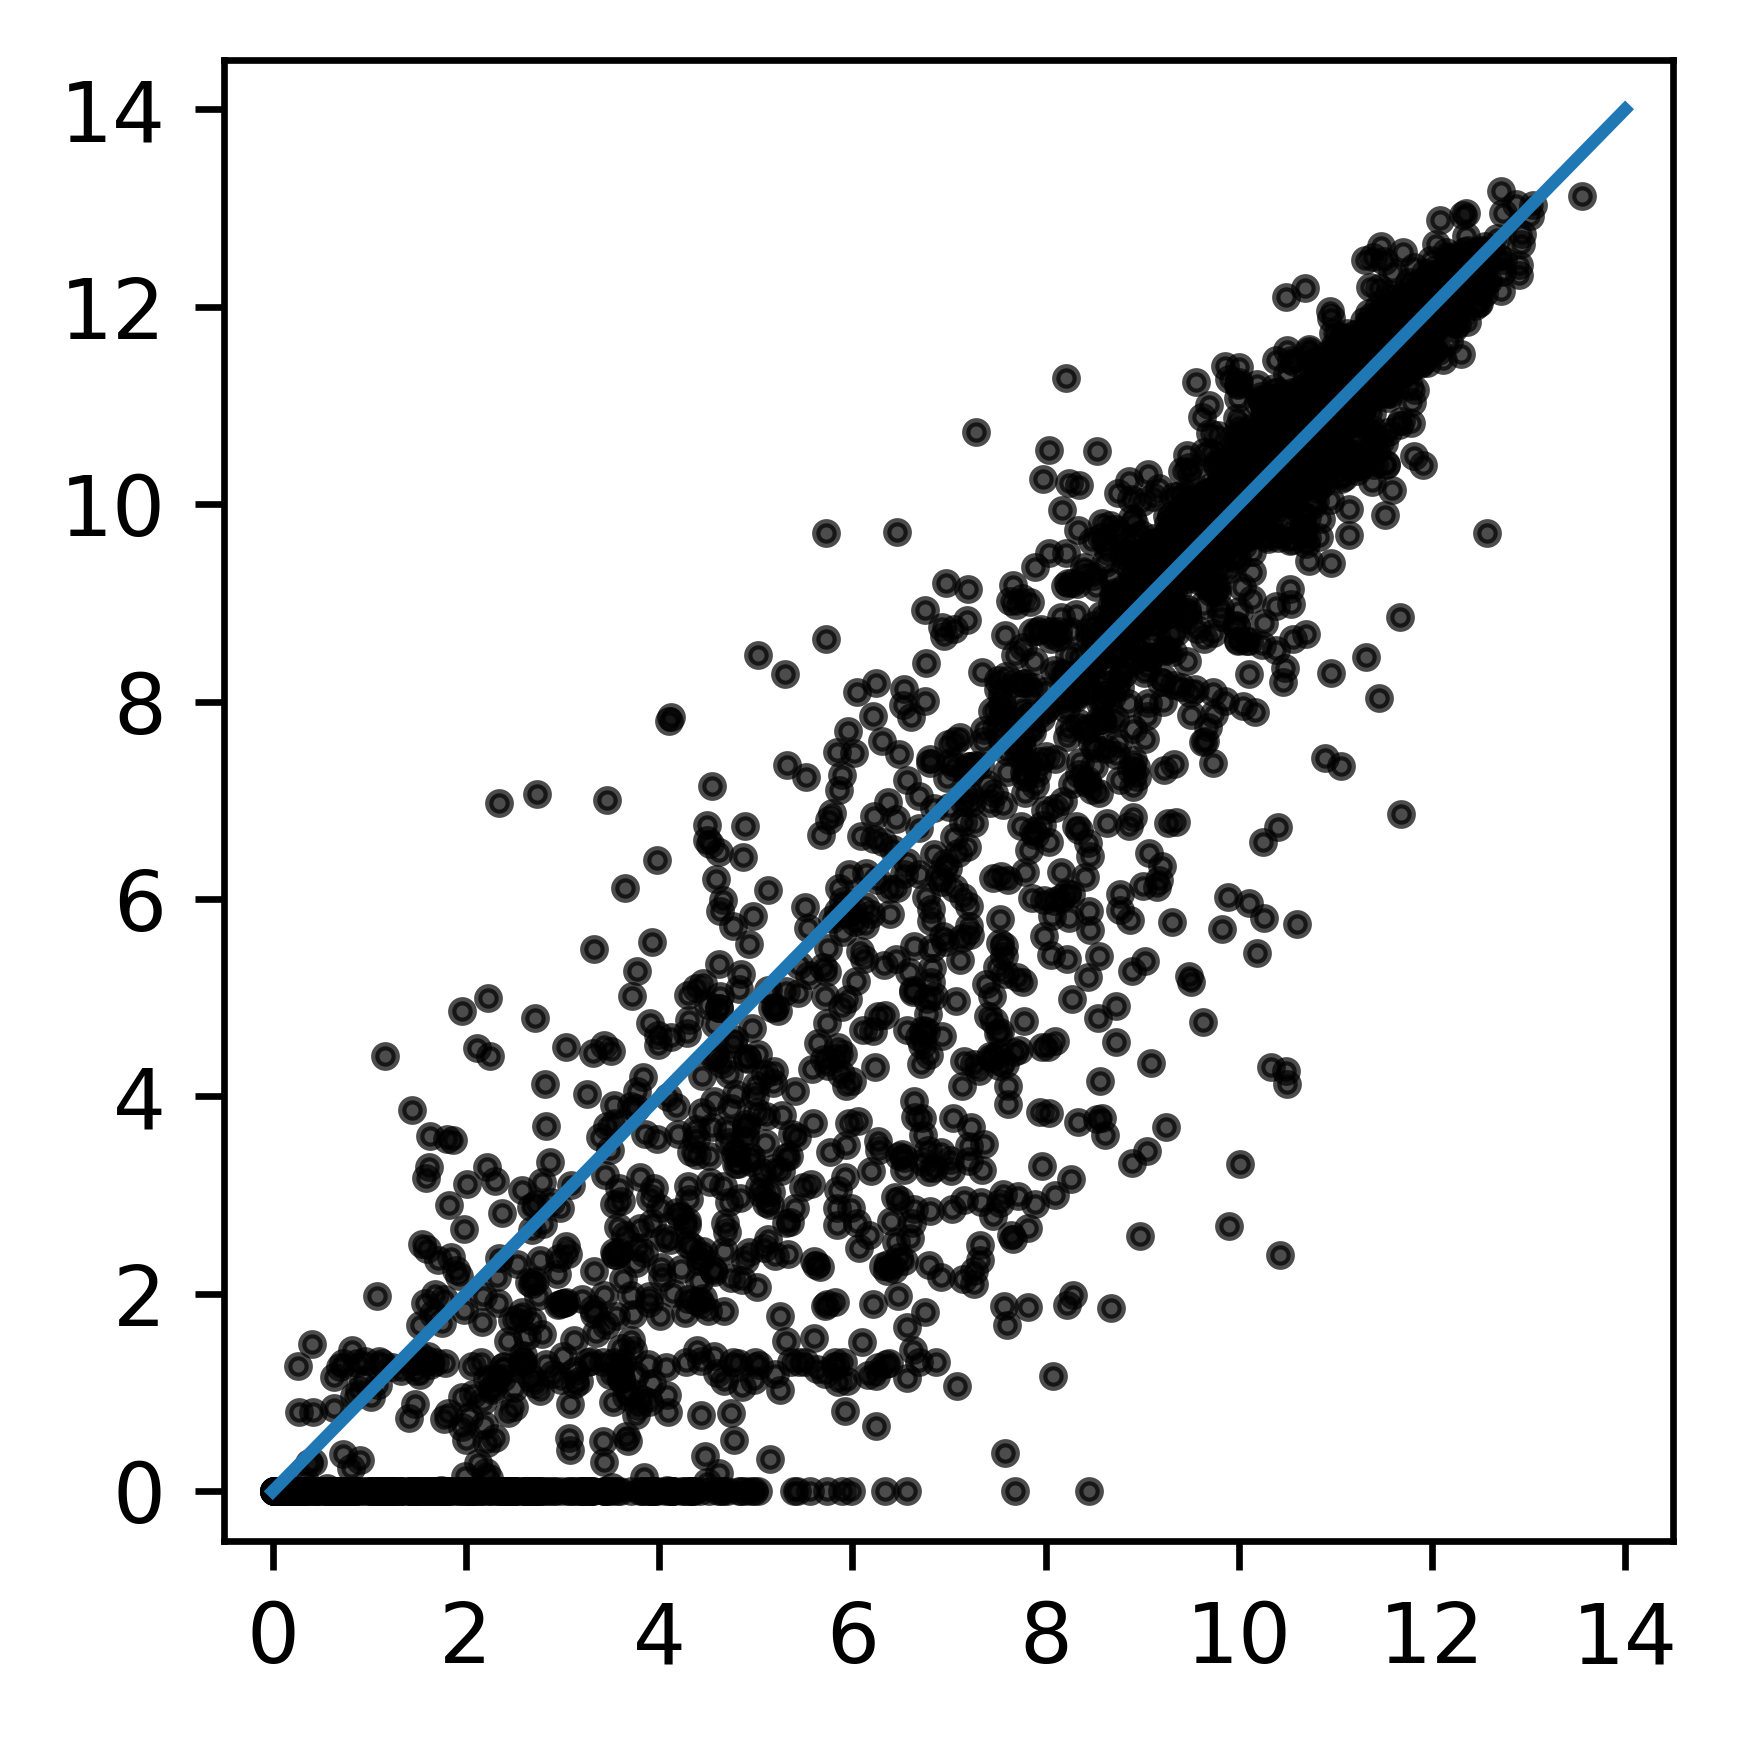

In [12]:
#Plot test predictions (fold 0) for GTEx blood

import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

target_ix = 875

y_p = np.array(df_pred[cols[target_ix]].values, dtype='float32')
y_t = np.array(df_true[cols[target_ix]].values, dtype='float32')

print("Spearman R = " + str(round(spearmanr(y_p, y_t)[0], 3)))
print("Pearson R = " + str(round(pearsonr(y_p, y_t)[0], 3)))

print(" - n = " + str(len(df_pred)))

f = plt.figure(figsize=(3, 3), dpi=600)

plt.scatter(y_p, y_t, s=6, color='black', alpha=0.7, rasterized=True)

plt.plot([0, 14], [0, 14])

plt.xlim(0. - 0.5, 14. + 0.5)
plt.ylim(0. - 0.5, 14. + 0.5)

plt.xticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=10)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=10)

plt.tight_layout()

plt.savefig("borzoi_v2_gtex_blood_pred_f0.pdf")

plt.show()


In [13]:
#Print ENCODE T-cell target

targets_strand_df.loc[targets_strand_df['description'] == "RNA:T-cell male adult (38 years)"]


,identifier,pearsonr,r2,pearsonr_norm,r2_norm,pearsonr_gene,description,row_index
7064,ENCFF983RQU+,0.951919,0.904636,0.781421,0.610171,0.891658,RNA:T-cell male adult (38 years),591


Spearman R = 0.958
Pearson R = 0.952
 - n = 2487


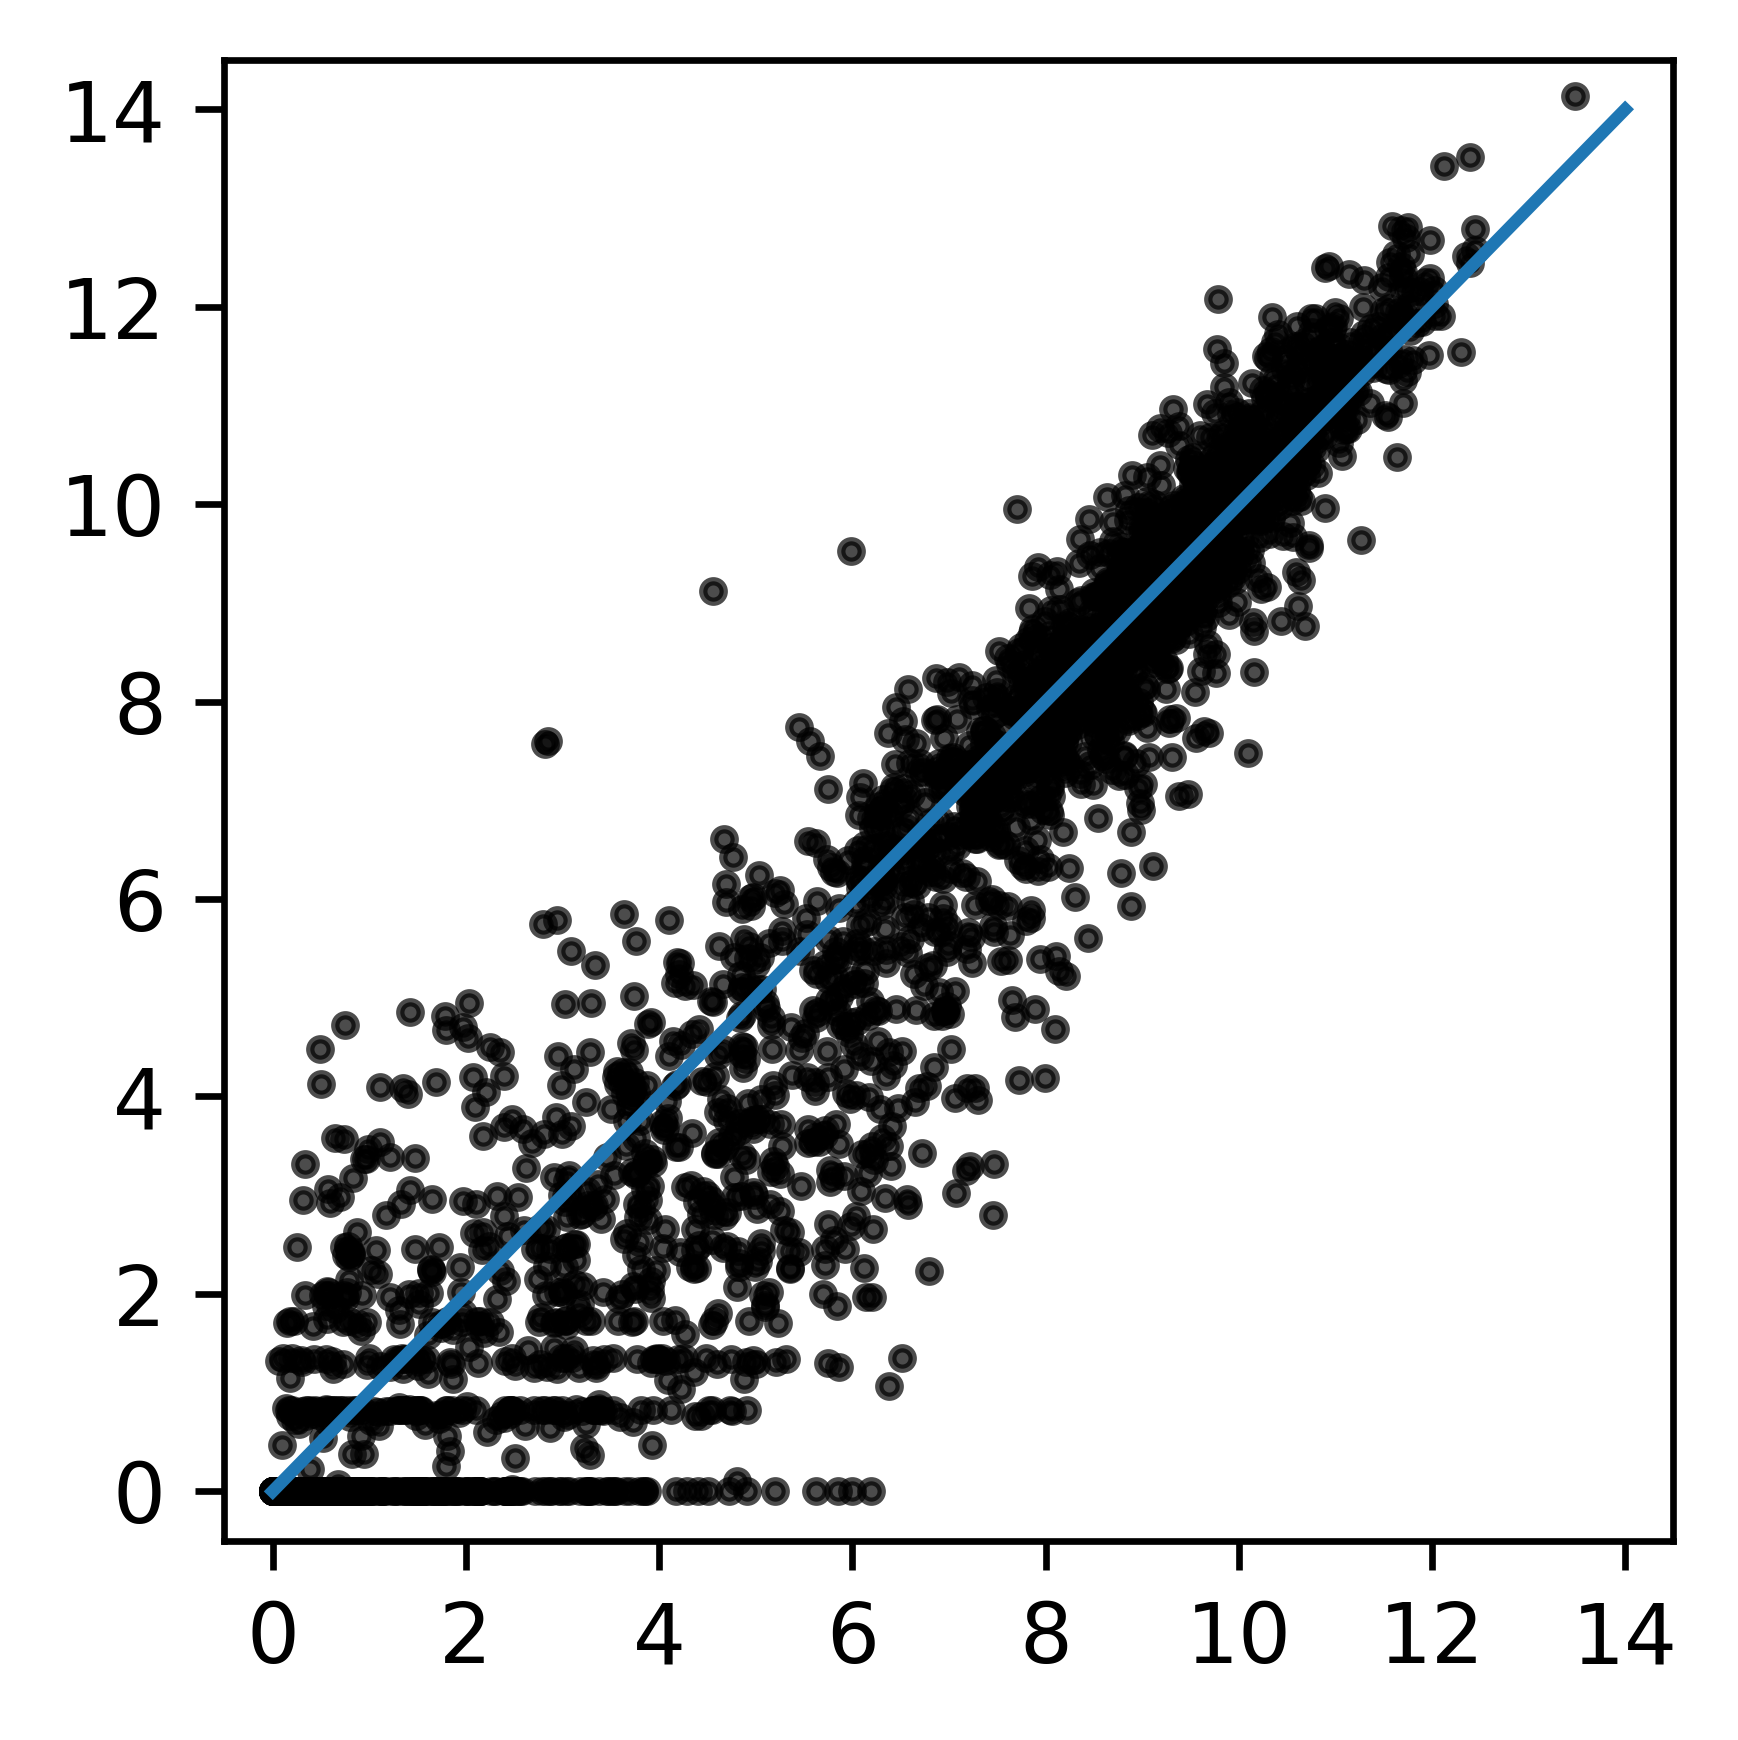

In [14]:
#Plot test predictions (fold 0) for ENCODE T-cells

import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

target_ix = 591

y_p = np.array(df_pred[cols[target_ix]].values, dtype='float32')
y_t = np.array(df_true[cols[target_ix]].values, dtype='float32')

print("Spearman R = " + str(round(spearmanr(y_p, y_t)[0], 3)))
print("Pearson R = " + str(round(pearsonr(y_p, y_t)[0], 3)))

print(" - n = " + str(len(df_pred)))

f = plt.figure(figsize=(3, 3), dpi=600)

plt.scatter(y_p, y_t, s=6, color='black', alpha=0.7, rasterized=True)

plt.plot([0, 14], [0, 14])

plt.xlim(0. - 0.5, 14. + 0.5)
plt.ylim(0. - 0.5, 14. + 0.5)

plt.xticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=10)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=10)

plt.tight_layout()

plt.savefig("borzoi_v2_encode_tcell_pred_f0.pdf")

plt.show()
